# Fast Fourier Transforms With Python

This Jupyter interactive notebook show you how you can make Fast Fourier Transforms (FFT) using Python and SciPy. 
This is just a quick example tutorial, the real documentation is at: https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/fftpack.html for the FFT and http://matplotlib.org/index.html for matplotlib

We first import matplotlib, using the "inline" argument to cause it to display the graphs right inside this notbook.

In [2]:
%matplotlib inline

Next we also import the numpy library, and call it "np", and the matplotlib.pyplot library and call it "plt", and then get the FFT code from scipy.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.

Define some useful variables, N, for the number of points, and T, for the sample spacing in time. We will have 2 seconds in time here, with a 1001 points total on the t axis. We then create a linear space, i.e. a big array with evenly spaced numbers, each 0.002 apart. We show the first 5 elements of the array.

In [26]:
F = 5.
N = 1001
T = 2./N
x = np.linspace(0.,T*N,N)
x[0:5]

array([ 0.   ,  0.002,  0.004,  0.006,  0.008])

Now we want to create some kind of signal. In this case, 3 sine waves with frequencies F, 2F and 4F (5,10,20)Hz, and amplitudes of 2, 1 and 0.5 Volts. We create this signal simply using the sin function from numpy.

In [27]:
y = 2.*np.sin(2*np.pi*F*x)+1.*np.sin(2*np.pi*2*F*x)++0.5*np.sin(2*np.pi*4*F*x)

Let's make a plot of this signal, as it would show up on an osciloscope.

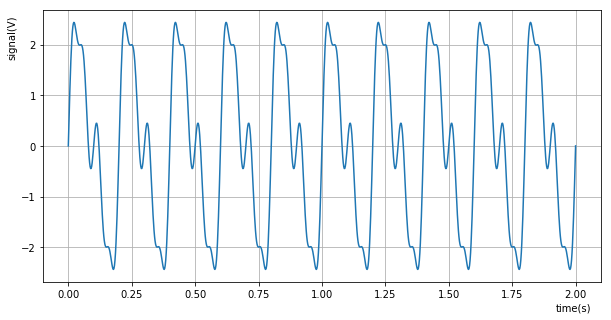

In [28]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))

We now want to see the Fourier Transform of this signal. We need to note a few important details though. First of all, we have a signal that lasts only from 0 to 2 seconds. The full Fourier Transform is defined from $-\infty$ to $+\infty$, so we don't *quite* get three infinitely narrow spikes, which is what we would expect. This issue has to do with the subtle bit of Fast Fourier Transforms called "windowing". Most of the time you can ignore this, if you accept that the window causes artifacts (i.e. the FFT will not perfectly go to zero in between the peaks.)

For the x axis, we use the handy fftfreq() function, which automatically creates the correct x-axis. 

The FFT will have negative and positive frequencies, which in this care are put in the array as [positive values,...,negative values]. This is how the algorithm works, but it doesn't work nice for plotting. The function fftshift() helps out by ordering the array from negative to positive values. In our case, with an input of real values, you only need the positive values of the FFT, so fftshift isn't strictly needed.

We also use ax.set_xlim to set the limit of the x-axis, since otherwise it goes from $-1/2T$ to $+1/2T$. We only need the interval from zero to 30 Hz to see all the signal.

(0, 30)

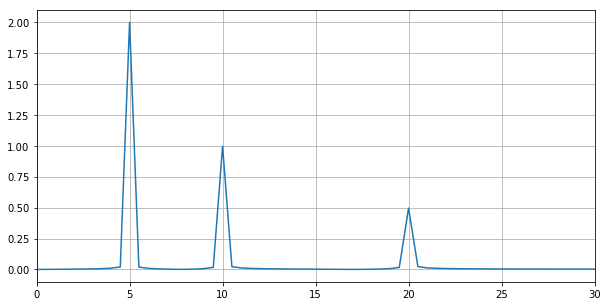

In [61]:
x_fft = fftshift(fftfreq(N,T))
y_fft = fftshift(fft(y))
plt.figure(figsize=(10,5))
plt.plot(x_fft,2./N*np.abs(y_fft))
plt.grid(True)
ax = plt.gca()
ax.set_xlim(0,30)

## Square Wave
Now we will look at the FFT of a square wave signal. There is an excellent signal processing library for Python in SciPy called "signal", and it has a ready to go square wave form. See (https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html). We will use that to create the waveform and then create the FFT. We will use the same frequency, F. The documentation states we need to multiply with $2\pi$. The amplitude will be from -1 to 1.

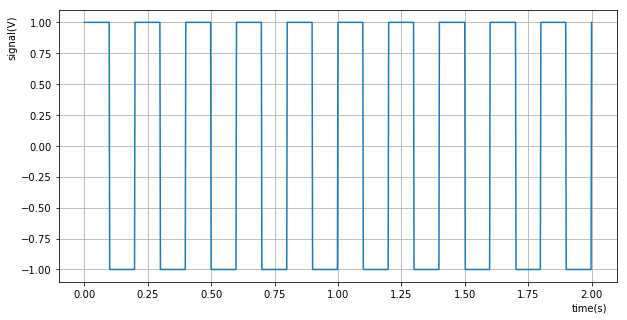

In [62]:
from scipy import signal
y_sq =signal.square(2*np.pi*F*x)
plt.figure(figsize=(10,5))
plt.plot(x,y_sq)
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))

(0, 100)

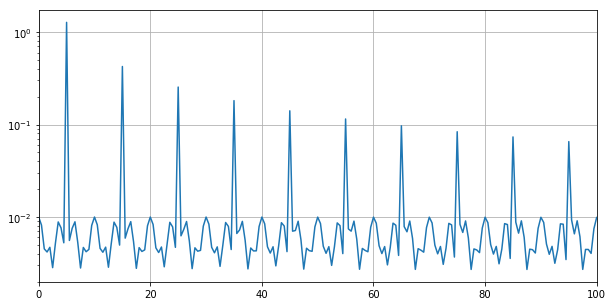

In [70]:
y_sq_fft = fftshift(fft(y_sq))
plt.figure(figsize=(10,5))
plt.semilogy(x_fft,2./N*np.abs(y_sq_fft))
plt.grid(True)
ax = plt.gca()
ax.set_xlim(0,100)

What we see is that the sharp edges of the square wave can only be made with really high frequencies. This is exactly what you expect from Fourier Transforms: an infinite series of spikes a distance of $2F$ apart, with diminishing amplitudes. The series is truncated in our case because of the limited time for the input signal. The log y-scale emphasizes the artifacts due to the windowing. They would diminish as we let $N\rightarrow\infty$.